<a href="https://colab.research.google.com/github/rry123/Machine-Learning/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
data = pd.read_csv('diabetes.csv')
data

df = pd.DataFrame(data)
df.head()

null_values = df.isnull()
print(null_values.sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
y = df['Outcome']
x = df.drop("Outcome", axis = 1)

print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [8]:
i = 0
for i in x:
  mean_without_null = np.nanmean(x[i])
  print(mean_without_null)
  x[i] = x[i].fillna(mean_without_null)

3.8450520833333335
120.89453125
69.10546875
20.536458333333332
79.79947916666667
31.992578124999998
0.47187630208333325
33.240885416666664


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)

In [11]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [14]:
lmd = 0.01
alpha = 0.001
iterations = 10
def fit(x, y):
  w = np.zeros(8)
  b = 0

  for it in range (iterations):
    i = 0

    while(i < len(x)):
      xi = [x.iloc[i]['Pregnancies'],x.iloc[i]['Glucose'],x.iloc[i]['BloodPressure'],x.iloc[i]['SkinThickness'],x.iloc[i]['Insulin'],x.iloc[i]['BMI'],x.iloc[i]['DiabetesPedigreeFunction'],x.iloc[i]['Age']]

      if y[i] * (np.dot(xi, w)-b) >= 1:
        w-= alpha*(2*lmd*w)
      else:
        w-= alpha*(2*lmd*w - np.dot(xi, y[i]))
        b-= alpha*y[i]
      i = i+1

  return w, b



In [18]:
w, b = fit(x, y)
print(w)
print(b)

[ 0.89349677  0.14730536 -0.44367356 -0.13029134  0.11714285 -0.0156531
  0.0552739  -0.06170567]
0.3000000000000002


In [19]:
def predict(x):
  pred = np.dot(x, w)-b
  result = [1 if val > 0 else -1 for val in pred]
  return result

In [20]:
res = predict(x)

print(np.mean(res == y))

0.6471354166666666


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y, res))

              precision    recall  f1-score   support

          -1       0.71      0.77      0.74       500
           1       0.49      0.41      0.45       268

    accuracy                           0.65       768
   macro avg       0.60      0.59      0.60       768
weighted avg       0.63      0.65      0.64       768



In [24]:
from sklearn import metrics
precision = metrics.precision_score(y, res, average = 'weighted')
recall = metrics.recall_score(y, res, average = 'weighted')
f1_score = metrics.f1_score(y, res, average = 'weighted')

print(precision)
print(recall)
print(f1_score)

0.6349558778391651
0.6471354166666666
0.6390206134525089


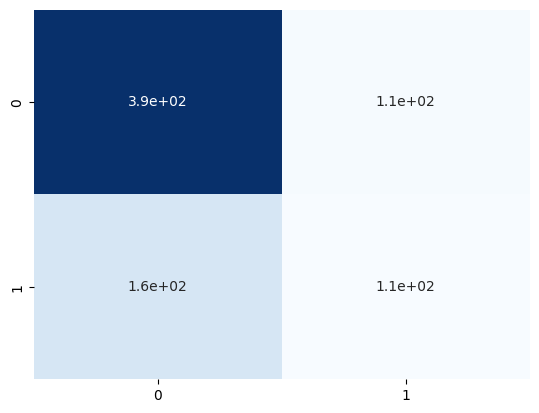

In [25]:

conf_matrix = metrics.confusion_matrix(y, res)
sns.heatmap(conf_matrix, cbar = False , annot= True, cmap  = "Blues")

plt.show()